# 📝 Microsoft Learn Catalog API
- Kim Audrey Magan

This analysis will show the count of the loaded data from the MS Learn Catalog API. The API contains the tables:

| Key                  | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| modules              | An array of published modules.                                              |
| units                | An array of published units.                                                |
| learningPaths        | An array of published learning paths.                                       |
| appliedSkills        | An array of published applied skills.                                       |
| mergedCertifications | An array of published certifications merged with exams.                     |
| certifications       | An array of published certifications.                                       |
| exams                | An array of published exams.                                                |
| courses              | An array of published instructor-led training courses.                      |
| levels               | An array of possible audience levels.                                       |
| products             | An array of possible products and services covered in the catalog.          |
| roles                | An array of possible job roles.                                             |
| subjects             | An array of possible subject tags.                                          |

In [ ]:
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get the environment variable
load_dotenv()
string_connection = os.getenv("DATABASE_URI_LOCAL")

In [2]:
# Connect to the database
try:
    conn_engine = create_engine(string_connection)
    print("Connection to the database, established.")
except Exception as e:
    print(f"Error: {e}")


Connection to the database, established.


In [12]:
table_names = [
    "modules",
    "units",
    "learning_paths",
    "applied_skills",
    "certifications",
    "merged_certifications",
    "exams",
    "courses",
    "levels",
    "products",
    "roles",
    "subjects"
]

# Table-count relationship
table_count = {}

for table_name in table_names:
    with conn_engine.connect() as con:
        result = con.execute(
            text(f"SELECT COUNT(*) FROM {table_name}")
        )
        count = result.scalar()
        table_count[table_name] = count

## 📐Table Counts

In [22]:
df = pd.DataFrame(list(table_count.items()), columns=['table_name', 'row_count'])
df

,table_name,row_count
0,modules,3372
1,units,27031
2,learning_paths,836
3,applied_skills,45
4,certifications,148
5,merged_certifications,148
6,exams,138
7,courses,156
8,levels,3
9,products,59


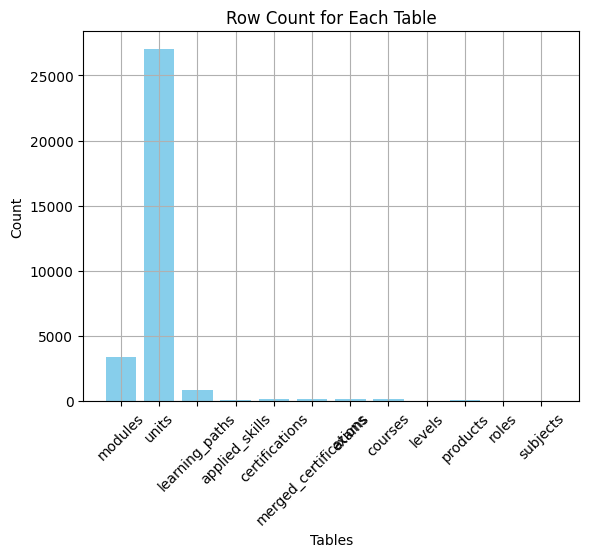

In [18]:
plt.bar(table_count.keys(), table_count.values(), color='skyblue')
plt.xlabel('Tables')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Row Count for Each Table')
plt.grid()
plt.show()

end